In [176]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


In [177]:
def clean_df(df):
    
    ret = df.copy()
    
    header = ret.iloc[0].fillna(method="ffill").fillna("") + " " + ret.iloc[1]
    header = header.apply(lambda x: x.strip())
        
    ret.columns = header
    ret = ret.drop(0).drop(1)
    
    return ret


def get_data(year="2016-17"):
    
        ret = pd.read_csv("data/CTSchoolDaySAT-needs-" + year + ".csv",
                          skiprows=3,header=None)
        
        ret = clean_df(ret)
        
        for c in ret.columns[4:]:
            ret[c] = pd.to_numeric(ret[c],errors="coerce")
            
        ret["year"] = year
        
        ret["subj"] = ret["Subject"]
        #ret = ret.set_index(["year","District","Subject","High Needs (F, R, ELL or SWD)"])
        
#         ret = ret.set_index("District")
        ret = ret.set_index(["year","District","Subject"])

        return ret
    
df = get_data()
print len(get_data())
df.head()

570


District Code  \
year    District                                         Subject                 
2016-17 Achievement First Hartford Academy Inc. District ELA        ="2880013"   
                                                         Math       ="2880013"   
        Amistad Academy District                         ELA        ="2790013"   
                                                         ELA        ="2790013"   
                                                         Math       ="2790013"   

                                                                 High Needs (F, R, ELL or SWD)  \
year    District                                         Subject                                 
2016-17 Achievement First Hartford Academy Inc. District ELA                                 Y   
                                                         Math                                Y   
        Amistad Academy District                         ELA                                 Y   
                                                         ELA                                 N   
                                                         Math                                Y   

                                                                  Total Numberof Students  \
year    District                                         Subject                            
2016-17 Achievement First Hartford Academy Inc. District ELA                         39.0   
                                                         Math                        39.0   
        Amistad Academy District                         ELA                         30.0   
                                                         ELA                         20.0   
                                                         Math                        30.0   

                                                                  Total NumberTested  \
year    District                                         Subject                       
2016-17 Achievement First Hartford Academy Inc. District ELA                    39.0   
                                                         Math                   39.0   
        Amistad Academy District                         ELA                    29.0   
                                                         ELA                    19.0   
                                                         Math                   29.0   

                                                                  Connecticut School Day SATParticipationRate  \
year    District                                         Subject                                                
2016-17 Achievement First Hartford Academy Inc. District ELA                                            100.0   
                                                         Math                                           100.0   
        Amistad Academy District                         ELA                                             96.7   
                                                         ELA                                             95.0   
                                                         Math                                            96.7   

                                                                  Total Numberwith Scored Tests  \
year    District                                         Subject                                  
2016-17 Achievement First Hartford Academy Inc. District ELA                               39.0   
                                                         Math                              38.0   
        Amistad Academy District                         ELA                               28.0   
                                                         ELA                               19.0   
                                                         Math                              28.0   

                                                

In [178]:
def get_agg_data(year="2016-17"):
    
    ret = pd.read_csv("data/CTSchoolDaySAT" + year + ".csv",skiprows=3,header=None)

    ret = clean_df(ret)
    
    ret["year"] = year
    
    ret["subj"] = ret["Subject"]
    
    ret = ret.set_index(["year","District","Subject"])
    
    for c in ret.columns[1:]:
            ret[c] = pd.to_numeric(ret[c],errors="coerce")

    return ret

agg_df = get_agg_data()
agg_df.head()

District Code  \
year    District                                         Subject                 
2016-17 Achievement First Hartford Academy Inc. District ELA        ="2880013"   
                                                         Math       ="2880013"   
        Amistad Academy District                         ELA        ="2790013"   
                                                         Math       ="2790013"   
        Ansonia School District                          ELA        ="0020011"   

                                                                  Total Numberof Students  \
year    District                                         Subject                            
2016-17 Achievement First Hartford Academy Inc. District ELA                         39.0   
                                                         Math                        39.0   
        Amistad Academy District                         ELA                         50.0   
                                                         Math                        50.0   
        Ansonia School District                          ELA                        134.0   

                                                                  Total NumberTested  \
year    District                                         Subject                       
2016-17 Achievement First Hartford Academy Inc. District ELA                    39.0   
                                                         Math                   39.0   
        Amistad Academy District                         ELA                    48.0   
                                                         Math                   48.0   
        Ansonia School District                          ELA                   127.0   

                                                                  Connecticut School Day SATParticipationRate  \
year    District                                         Subject                                                
2016-17 Achievement First Hartford Academy Inc. District ELA                                            100.0   
                                                         Math                                           100.0   
        Amistad Academy District                         ELA                                             96.0   
                                                         Math                                            96.0   
        Ansonia School District                          ELA                                             94.8   

                                                                  Total Numberwith Scored Tests  \
year    District                                         Subject                                  
2016-17 Achievement First Hartford Academy Inc. District ELA                               39.0   
                                                         Math                              38.0   
        Amistad Academy District                         ELA                               47.0   
                                                         Math                              47.0   
        Ansonia School District                          ELA                              127.0   

                                                                  Level 1Not Met Count  \
year    District                                         Subject                         
2016-17 Achievement First Hartford Academy Inc. District ELA                       NaN   
                                                         Math                      NaN   
        Amistad Academy District                         ELA                       NaN   
                                                         Math                     10.0   
        Ansonia School District                          ELA                      38.0   

                                                                  Level 1Not Met %  \
year    District  

In [179]:
high_needs = get_data()[get_data()["High Needs (F, R, ELL or SWD)"] == "Y"]
not_high_needs = get_data()[get_data()["High Needs (F, R, ELL or SWD)"] == "N"]

print len(high_needs)
print len(not_high_needs)
print len(high_needs) + len(not_high_needs)

print "OK?", len(high_needs) + len(not_high_needs) == len(get_data())

294
276
570
OK? True


In [180]:
both_df = high_needs.join(not_high_needs, how="outer",lsuffix="_hn",rsuffix="_not_hn")\
.join(agg_df,how="outer",rsuffix="_all")
both_df.head()

District Code_hn  \
year    District                                         Subject                    
2016-17 Achievement First Hartford Academy Inc. District ELA           ="2880013"   
                                                         Math          ="2880013"   
        Amistad Academy District                         ELA           ="2790013"   
                                                         Math          ="2790013"   
        Ansonia School District                          ELA           ="0020011"   

                                                                 High Needs (F, R, ELL or SWD)_hn  \
year    District                                         Subject                                    
2016-17 Achievement First Hartford Academy Inc. District ELA                                    Y   
                                                         Math                                   Y   
        Amistad Academy District                         ELA                                    Y   
                                                         Math                                   Y   
        Ansonia School District                          ELA                                    Y   

                                                                  Total Numberof Students_hn  \
year    District                                         Subject                               
2016-17 Achievement First Hartford Academy Inc. District ELA                            39.0   
                                                         Math                           39.0   
        Amistad Academy District                         ELA                            30.0   
                                                         Math                           30.0   
        Ansonia School District                          ELA                            94.0   

                                                                  Total NumberTested_hn  \
year    District                                         Subject                          
2016-17 Achievement First Hartford Academy Inc. District ELA                       39.0   
                                                         Math                      39.0   
        Amistad Academy District                         ELA                       29.0   
                                                         Math                      29.0   
        Ansonia School District                          ELA                       87.0   

                                                                  Connecticut School Day SATParticipationRate_hn  \
year    District                                         Subject                                                   
2016-17 Achievement First Hartford Academy Inc. District ELA                                               100.0   
                                                         Math                                              100.0   
        Amistad Academy District                         ELA                                                96.7   
                                                         Math                                               96.7   
        Ansonia School District                          ELA                                                92.6   

                                                                  Total Numberwith Scored Tests_hn  \
year    District                                         Subject                                     
2016-17 Achievement First Hartford Academy Inc. District ELA                                  39.0   
                                                         Math                                 38.0   
        Amistad Academy District                         ELA                                  28.0   
                                                         Math                                 28.0   
        Ansonia School Di

In [181]:
for c in both_df.columns:
    print c

District Code_hn
High Needs (F, R, ELL or SWD)_hn
Total Numberof Students_hn
Total NumberTested_hn
Connecticut School Day SATParticipationRate_hn
Total Numberwith Scored Tests_hn
Level 1Not Met Count_hn
Level 1Not Met %_hn
Level 2Approaching Count_hn
Level 2Approaching %_hn
Level 3Met Count_hn
Level 3Met %_hn
Level 4Exceeded Count_hn
Level 4Exceeded %_hn
Level 3&4Met or Exceeded Count_hn
Level 3&4Met or Exceeded %_hn
Level 3&4Met or Exceeded AverageScore_hn
subj_hn
District Code_not_hn
High Needs (F, R, ELL or SWD)_not_hn
Total Numberof Students_not_hn
Total NumberTested_not_hn
Connecticut School Day SATParticipationRate_not_hn
Total Numberwith Scored Tests_not_hn
Level 1Not Met Count_not_hn
Level 1Not Met %_not_hn
Level 2Approaching Count_not_hn
Level 2Approaching %_not_hn
Level 3Met Count_not_hn
Level 3Met %_not_hn
Level 4Exceeded Count_not_hn
Level 4Exceeded %_not_hn
Level 3&4Met or Exceeded Count_not_hn
Level 3&4Met or Exceeded %_not_hn
Level 3&4Met or Exceeded AverageScore_not_hn


In [182]:
(both_df["Total Numberwith Scored Tests"].fillna(0) ==\
both_df["Total Numberwith Scored Tests_hn"].fillna(0) + both_df["Total Numberwith Scored Tests_not_hn"].fillna(0))\
.value_counts()

True     290
False      6
dtype: int64

In [183]:
print (both_df["Total Numberof Students"].fillna(0) ==\
both_df["Total Numberof Students_hn"].fillna(0) + both_df["Total Numberof Students_not_hn"].fillna(0))\
.value_counts()


True     290
False      6
dtype: int64


In [184]:
# The only ones that don't add up have nulls... so we're good

both_df[both_df["Total Numberof Students"].fillna(0) !=\
both_df["Total Numberof Students_hn"].fillna(0) + both_df["Total Numberof Students_not_hn"].fillna(0)]\
[["Total Numberof Students_hn","Total Numberof Students_not_hn","Total Numberof Students"]]

Total Numberof Students_hn  \
year    District                    Subject                               
2016-17 Norwich School District     ELA                             NaN   
                                    Math                            NaN   
        Path Academy District       ELA                             NaN   
                                    Math                            NaN   
        The Bridge Academy District ELA                             NaN   
                                    Math                            NaN   

                                             Total Numberof Students_not_hn  \
year    District                    Subject                                   
2016-17 Norwich School District     ELA                                 NaN   
                                    Math                                NaN   
        Path Academy District       ELA                                 NaN   
                                    Math                                NaN   
        The Bridge Academy District ELA                                 NaN   
                                    Math                                NaN   

                                             Total Numberof Students  
year    District                    Subject                           
2016-17 Norwich School District     ELA                         10.0  
                                    Math                        10.0  
        Path Academy District       ELA                         46.0  
                                    Math                        46.0  
        The Bridge Academy District ELA                         38.0  
                                    Math                        38.0

In [185]:
both_df["total_tests"] = both_df["Total Numberof Students_hn"]\
+ both_df["Total Numberof Students_not_hn"]
both_df["pct_hn"] = both_df["Total Numberof Students_hn"] / both_df["total_tests"]
both_df

District Code_hn  \
year    District                                         Subject                    
2016-17 Achievement First Hartford Academy Inc. District ELA           ="2880013"   
                                                         Math          ="2880013"   
        Amistad Academy District                         ELA           ="2790013"   
                                                         Math          ="2790013"   
        Ansonia School District                          ELA           ="0020011"   
                                                         Math          ="0020011"   
        Area Cooperative Educational Services            ELA           ="2440014"   
                                                         Math          ="2440014"   
        Avon School District                             ELA           ="0040011"   
                                                         Math          ="0040011"   
        Berlin School District                           ELA           ="0070011"   
                                                         Math          ="0070011"   
        Bethel School District                           ELA           ="0090011"   
                                                         Math          ="0090011"   
        Bloomfield School District                       ELA           ="0110011"   
                                                         Math          ="0110011"   
        Bolton School District                           ELA           ="0120011"   
                                                         Math          ="0120011"   
        Branford School District                         ELA           ="0140011"   
                                                         Math          ="0140011"   
        Bridgeport Achievement First District            ELA           ="2850013"   
                                                         Math          ="2850013"   
        Bridgeport School District                       ELA           ="0150011"   
                                                         Math          ="0150011"   
        Bristol School District                          ELA           ="0170011"   
                                                         Math          ="0170011"   
        Brookfield School District                       ELA           ="0180011"   
                                                         Math          ="0180011"   
        Brooklyn School District                         ELA           ="0190011"   
                                                         Math          ="0190011"   
...                                                                           ...   
        Waterford School District                        ELA           ="1520011"   
                                                         Math          ="1520011"   
        Watertown School District                        ELA           ="1530011"   
                                                         Math          ="1530011"   
        West Hartford School District                    ELA           ="1550011"   
                                                         Math          ="1550011"   
        West Haven School District                       ELA           ="1560011"   
                                                         Math          ="1560011"   
        Westbrook School District                        ELA           ="1540011"   
                                                         Math          ="1540011"   
        Weston School District                           ELA           ="1570011"   
                                                         Math          ="1570011"   
        Westport School District                         ELA           ="1580011"   
                                                         Math          ="1580011"   
        Wethersfield School District                     ELA          

In [186]:
both_df.sort_values(by="pct_hn",ascending=True)

District Code_hn  \
year    District                                         Subject                    
2016-17 Weston School District                           ELA           ="1570011"   
                                                         Math          ="1570011"   
        Woodstock Academy District                       ELA           ="9030022"   
                                                         Math          ="9030022"   
        Ridgefield School District                       Math          ="1180011"   
                                                         ELA           ="1180011"   
        East Granby School District                      ELA           ="0400011"   
                                                         Math          ="0400011"   
        Newtown School District                          ELA           ="0970011"   
                                                         Math          ="0970011"   
        Regional School District 08                      ELA           ="2080012"   
                                                         Math          ="2080012"   
        Regional School District 13                      Math          ="2130012"   
                                                         ELA           ="2130012"   
        New Fairfield School District                    ELA           ="0910011"   
                                                         Math          ="0910011"   
        Regional School District 09                      Math          ="2090012"   
                                                         ELA           ="2090012"   
        Tolland School District                          ELA           ="1420011"   
                                                         Math          ="1420011"   
        Regional School District 18                      ELA           ="2180012"   
                                                         Math          ="2180012"   
        Somers School District                           ELA           ="1290011"   
                                                         Math          ="1290011"   
        Regional School District 07                      Math          ="2070012"   
                                                         ELA           ="2070012"   
        Regional School District 10                      Math          ="2100012"   
                                                         ELA           ="2100012"   
        Regional School District 05                      Math          ="2050012"   
                                                         ELA           ="2050012"   
...                                                                           ...   
        New London School District                       ELA           ="0950011"   
                                                         Math          ="0950011"   
        Achievement First Hartford Academy Inc. District ELA           ="2880013"   
                                                         Math          ="2880013"   
        Area Cooperative Educational Services            ELA           ="2440014"   
                                                         Math          ="2440014"   
        Brooklyn School District                         ELA           ="0190011"   
                                                         Math          ="0190011"   
        Cooperative Educational Services                 ELA           ="2430014"   
                                                         Math          ="2430014"   
        EdAdvance                                        ELA           ="2420014"   
                                                         Math          ="2420014"   
        Jumoke Academy District                          ELA                  NaN   
                                                         Math                 NaN   
        Norwich School District                          ELA          

In [187]:
both_df["pct_hn"].describe()

count    268.000000
mean       0.333671
std        0.185746
min        0.078431
25%        0.189873
50%        0.264214
75%        0.470588
max        0.931624
Name: pct_hn, dtype: float64

In [188]:
import numpy as np

In [189]:
both_df["pct_hn_bucket"] = (both_df["pct_hn"] * 10).apply(lambda x: np.ceil(x)) * 10
both_df["pct_hn_bucket"].value_counts()

30.0     82
20.0     64
50.0     36
60.0     30
40.0     26
70.0     10
80.0      8
10.0      6
90.0      4
100.0     2
Name: pct_hn_bucket, dtype: int64

In [191]:
bucket_stats = both_df.groupby("pct_hn_bucket").agg({"Level 1Not Met Count":np.sum,"Total Numberof Students":np.sum})
bucket_stats["pct"] = bucket_stats["Level 1Not Met Count"] / bucket_stats["Total Numberof Students"]
bucket_stats

,Level 1Not Met Count,Total Numberof Students,pct
pct_hn_bucket,,,
10.0,72.0,1740.0,0.041379
20.0,781.0,15216.0,0.051328
30.0,1941.0,21166.0,0.091704
40.0,532.0,4086.0,0.130201
50.0,2153.0,9572.0,0.224927
60.0,3466.0,13672.0,0.253511
70.0,1663.0,4328.0,0.384242
80.0,3114.0,7800.0,0.399231
90.0,562.0,1312.0,0.428354


In [192]:
both_df[both_df["pct_hn_bucket"] >= 90]

District Code_hn  \
year    District                    Subject                    
2016-17 New Britain School District ELA           ="0890011"   
                                    Math          ="0890011"   
        New London School District  ELA           ="0950011"   
                                    Math          ="0950011"   
        Windham School District     ELA           ="1630011"   
                                    Math          ="1630011"   

                                            High Needs (F, R, ELL or SWD)_hn  \
year    District                    Subject                                    
2016-17 New Britain School District ELA                                    Y   
                                    Math                                   Y   
        New London School District  ELA                                    Y   
                                    Math                                   Y   
        Windham School District     ELA                                    Y   
                                    Math                                   Y   

                                             Total Numberof Students_hn  \
year    District                    Subject                               
2016-17 New Britain School District ELA                           434.0   
                                    Math                          434.0   
        New London School District  ELA                           218.0   
                                    Math                          218.0   
        Windham School District     ELA                           107.0   
                                    Math                          107.0   

                                             Total NumberTested_hn  \
year    District                    Subject                          
2016-17 New Britain School District ELA                      384.0   
                                    Math                     384.0   
        New London School District  ELA                      200.0   
                                    Math                     200.0   
        Windham School District     ELA                      103.0   
                                    Math                     103.0   

                                             Connecticut School Day SATParticipationRate_hn  \
year    District                    Subject                                                   
2016-17 New Britain School District ELA                                                88.5   
                                    Math                                               88.5   
        New London School District  ELA                                                91.7   
                                    Math                                               91.7   
        Windham School District     ELA                                                96.3   
                                    Math                                               96.3   

                                             Total Numberwith Scored Tests_hn  \
year    District                    Subject                                     
2016-17 New Britain School District ELA                                 384.0   
                                    Math                                383.0   
        New London School District  ELA                                 200.0   
                                    Math                                199.0   
        Windham School District     ELA                                 103.0   
                                    Math                                103.0   

                                             Level 1Not Met Count_hn  \
year    District                    Subject                            
2016-17 New Britain School District ELA                        206.0   
                                    Math                       214.0   
        New London School Dist

In [193]:
both_df[both_df["pct_hn_bucket"] <= 10]

District Code_hn  \
year    District                   Subject                    
2016-17 Ridgefield School District ELA           ="1180011"   
                                   Math          ="1180011"   
        Weston School District     ELA           ="1570011"   
                                   Math          ="1570011"   
        Woodstock Academy District ELA           ="9030022"   
                                   Math          ="9030022"   

                                           High Needs (F, R, ELL or SWD)_hn  \
year    District                   Subject                                    
2016-17 Ridgefield School District ELA                                    Y   
                                   Math                                   Y   
        Weston School District     ELA                                    Y   
                                   Math                                   Y   
        Woodstock Academy District ELA                                    Y   
                                   Math                                   Y   

                                            Total Numberof Students_hn  \
year    District                   Subject                               
2016-17 Ridgefield School District ELA                            41.0   
                                   Math                           41.0   
        Weston School District     ELA                            16.0   
                                   Math                           16.0   
        Woodstock Academy District ELA                            21.0   
                                   Math                           21.0   

                                            Total NumberTested_hn  \
year    District                   Subject                          
2016-17 Ridgefield School District ELA                       34.0   
                                   Math                      34.0   
        Weston School District     ELA                       15.0   
                                   Math                      15.0   
        Woodstock Academy District ELA                       21.0   
                                   Math                      21.0   

                                            Connecticut School Day SATParticipationRate_hn  \
year    District                   Subject                                                   
2016-17 Ridgefield School District ELA                                                82.9   
                                   Math                                               82.9   
        Weston School District     ELA                                                 NaN   
                                   Math                                                NaN   
        Woodstock Academy District ELA                                               100.0   
                                   Math                                              100.0   

                                            Total Numberwith Scored Tests_hn  \
year    District                   Subject                                     
2016-17 Ridgefield School District ELA                                  34.0   
                                   Math                                 33.0   
        Weston School District     ELA                                  15.0   
                                   Math                                 15.0   
        Woodstock Academy District ELA                                  21.0   
                                   Math                                 21.0   

                                            Level 1Not Met Count_hn  \
year    District                   Subject                            
2016-17 Ridgefield School District ELA                          NaN   
                                   Math                         NaN   
        Weston School District     ELA                          NaN   
          

In [198]:
not_high_needs["Level 3&4Met or Exceeded %"].mean()

71.459459459459453

In [199]:
high_needs["Level 3&4Met or Exceeded %"].mean()

27.407017543859649

In [200]:
not_high_needs["Level 3&4Met or Exceeded %"].describe()

count    74.000000
mean     71.459459
std      22.709674
min      15.500000
25%      55.400000
50%      78.100000
75%      89.075000
max      98.900000
Name: Level 3&4Met or Exceeded %, dtype: float64

In [201]:
high_needs["Level 3&4Met or Exceeded %"].describe()

count    114.000000
mean      27.407018
std       16.996646
min        0.000000
25%       15.825000
50%       23.600000
75%       35.925000
max       80.000000
Name: Level 3&4Met or Exceeded %, dtype: float64

In [202]:
high_needs["Level 3&4Met or Exceeded AverageScore"].describe()

count    238.000000
mean     462.554622
std       30.842652
min      360.000000
25%      441.250000
50%      461.500000
75%      483.000000
max      551.000000
Name: Level 3&4Met or Exceeded AverageScore, dtype: float64

In [203]:
not_high_needs["Level 3&4Met or Exceeded AverageScore"].describe()

count    250.000000
mean     552.304000
std       40.460844
min      442.000000
25%      524.250000
50%      552.000000
75%      581.750000
max      650.000000
Name: Level 3&4Met or Exceeded AverageScore, dtype: float64

In [204]:
both_df["diff_score"] = both_df["Level 3&4Met or Exceeded AverageScore_not_hn"] - both_df["Level 3&4Met or Exceeded AverageScore_hn"]

In [206]:
both_df.sort_values(by="diff_score",ascending=False).head(10)

District Code_hn  \
year    District                    Subject                    
2016-17 Granby School District      Math          ="0560011"   
        Clinton School District     ELA           ="0270011"   
        Greenwich School District   Math          ="0570011"   
        Glastonbury School District Math          ="0540011"   
        Avon School District        ELA           ="0040011"   
        Regional School District 10 ELA           ="2100012"   
        The Gilbert School District Math          ="9020022"   
        Regional School District 07 Math          ="2070012"   
        Greenwich School District   ELA           ="0570011"   
        Glastonbury School District ELA           ="0540011"   

                                            High Needs (F, R, ELL or SWD)_hn  \
year    District                    Subject                                    
2016-17 Granby School District      Math                                   Y   
        Clinton School District     ELA                                    Y   
        Greenwich School District   Math                                   Y   
        Glastonbury School District Math                                   Y   
        Avon School District        ELA                                    Y   
        Regional School District 10 ELA                                    Y   
        The Gilbert School District Math                                   Y   
        Regional School District 07 Math                                   Y   
        Greenwich School District   ELA                                    Y   
        Glastonbury School District ELA                                    Y   

                                             Total Numberof Students_hn  \
year    District                    Subject                               
2016-17 Granby School District      Math                           25.0   
        Clinton School District     ELA                            30.0   
        Greenwich School District   Math                          153.0   
        Glastonbury School District Math                           77.0   
        Avon School District        ELA                            42.0   
        Regional School District 10 ELA                            28.0   
        The Gilbert School District Math                           36.0   
        Regional School District 07 Math                           24.0   
        Greenwich School District   ELA                           153.0   
        Glastonbury School District ELA                            77.0   

                                             Total NumberTested_hn  \
year    District                    Subject                          
2016-17 Granby School District      Math                      22.0   
        Clinton School District     ELA                       30.0   
        Greenwich School District   Math                     145.0   
        Glastonbury School District Math                      73.0   
        Avon School District        ELA                       40.0   
        Regional School District 10 ELA                       26.0   
        The Gilbert School District Math                      33.0   
        Regional School District 07 Math                      24.0   
        Greenwich School District   ELA                      145.0   
        Glastonbury School District ELA                       73.0   

                                             Connecticut School Day SATParticipationRate_hn  \
year    District                    Subject                                                   
2016-17 Granby School District      Math                                               88.0   
        Clinton School District     ELA                                               100.0   
        Greenwich School District   Math                                               94.8   
        Glastonbury School District Math                                               94.8   
  

In [207]:
both_df[["diff_score","Level 3&4Met or Exceeded AverageScore_not_hn"]].corr()

,diff_score,Level 3&4Met or Exceeded AverageScore_not_hn
diff_score,1.000000,0.698105
Level 3&4Met or Exceeded AverageScore_not_hn,0.698105,1.000000


In [208]:
both_df[["diff_score","Level 3&4Met or Exceeded AverageScore_hn"]].corr()

,diff_score,Level 3&4Met or Exceeded AverageScore_hn
diff_score,1.000000,0.103878
Level 3&4Met or Exceeded AverageScore_hn,0.103878,1.000000


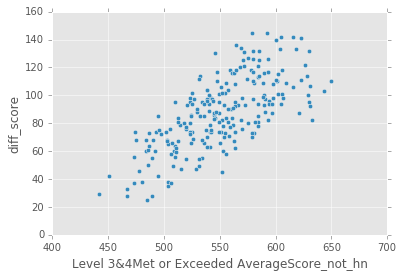

In [213]:
both_df.plot.scatter(y="diff_score",x="Level 3&4Met or Exceeded AverageScore_not_hn")

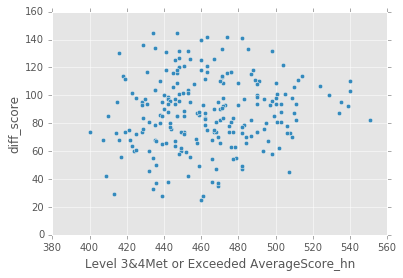

In [214]:
both_df.plot.scatter(y="diff_score",x="Level 3&4Met or Exceeded AverageScore_hn")

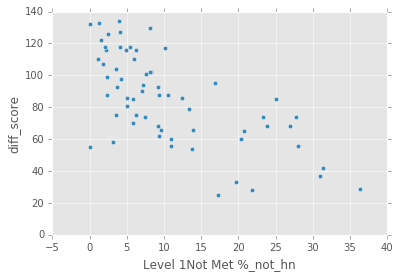

In [231]:
both_df.plot.scatter(x="Level 1Not Met %_not_hn",y="diff_score")

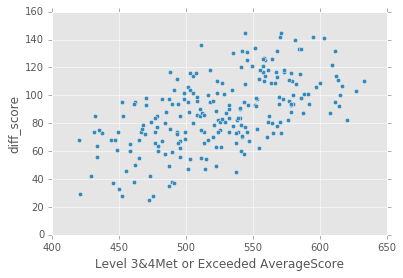

In [230]:
both_df.plot.scatter(y="diff_score",x="Level 3&4Met or Exceeded AverageScore")

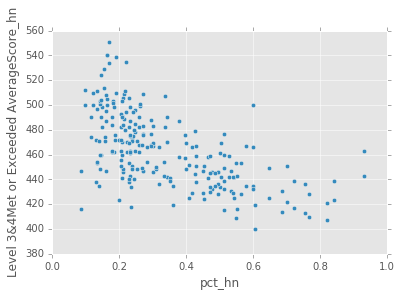

In [218]:
both_df.plot.scatter(x="pct_hn",y="Level 3&4Met or Exceeded Ave3rageScore_hn")

In [220]:
both_df[["pct_hn","Level 3&4Met or Exceeded AverageScore_hn"]].corr()

,pct_hn,Level 3&4Met or Exceeded AverageScore_hn
pct_hn,1.000000,-0.605706
Level 3&4Met or Exceeded AverageScore_hn,-0.605706,1.000000


In [ ]:
both_df[["pct_hn","Level 3&4Met or Exceeded AverageScore_hn"]].corr()

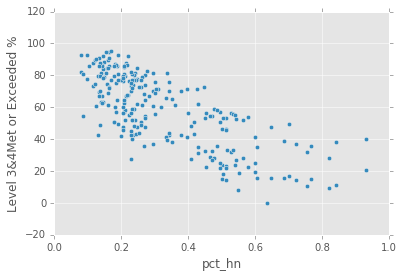

In [222]:
both_df.plot.scatter(x="pct_hn",y="Level 3&4Met or Exceeded %")

In [221]:
both_df[["pct_hn","Level 3&4Met or Exceeded %"]].corr()

,pct_hn,Level 3&4Met or Exceeded %
pct_hn,1.000000,-0.749262
Level 3&4Met or Exceeded %,-0.749262,1.000000


In [223]:
both_df["goal_pct"] = both_df["Level 3&4Met or Exceeded %"] / 100